In [3]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm


plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# NA 값 처리된 데이터셋 로드
train = pd.read_csv(r'C:\Users\USER\Documents\git\SKN_Team_project2\data1\nan_filtered_train_data.csv')


In [5]:
print(train.shape)
print(train.columns)

(50888, 59)
Index(['Unnamed: 0', 'CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMad

In [6]:
# 이상치 있는 컬럼 찾기

In [7]:
# IQR 기준 이상치 인덱스 찾기
def findOutliersIndex(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    outliers = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    return outliers.index  # 이상치 인덱스 반환

# IQR 기준 이상치 개수 찾기
def findOutliersCount(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    
    return len(y)  # 이상치 개수 반환

In [8]:
# 이상치 딕셔너리 저장 및 제거
outliers_dict = {}  # 딕셔너리 초기화

for i in train.columns:
    # 컬럼이 숫자형 데이터인지 확인 후 처리
    if train[i].dtype in ['int64', 'float64']:
        outliers_count = findOutliersCount(train, i)  # findOutliersCount 사용
        outliers_dict[i] = outliers_count  # 딕셔너리에 추가
    else:
        continue
        outliers_dict[i] = None  # 숫자가 아닌 경우 None 값으로 추가

# 결과 출력 (이상치 개수)
print(outliers_dict)

{'Unnamed: 0': 0, 'CustomerID': 0, 'MonthlyRevenue': 2997, 'MonthlyMinutes': 2567, 'TotalRecurringCharge': 824, 'DirectorAssistedCalls': 5530, 'OverageMinutes': 5842, 'RoamingCalls': 8835, 'PercChangeMinutes': 6847, 'PercChangeRevenues': 13311, 'DroppedCalls': 3702, 'BlockedCalls': 5517, 'UnansweredCalls': 3540, 'CustomerCareCalls': 6718, 'ThreewayCalls': 4613, 'ReceivedCalls': 3628, 'OutboundCalls': 3335, 'InboundCalls': 4967, 'PeakCallsInOut': 2805, 'OffPeakCallsInOut': 3619, 'DroppedBlockedCalls': 3703, 'CallForwardingCalls': 234, 'CallWaitingCalls': 7435, 'MonthsInService': 1196, 'UniqueSubs': 1869, 'ActiveSubs': 610, 'Handsets': 4393, 'HandsetModels': 1998, 'CurrentEquipmentDays': 1443, 'AgeHH1': 0, 'AgeHH2': 0, 'RetentionCalls': 1732, 'RetentionOffersAccepted': 876, 'ReferralsMadeBySubscriber': 2382, 'IncomeGroup': 0, 'AdjustmentsToCreditRating': 1826, 'CreditRating': 0}


In [9]:
# 각각 하나씩 확인후 극단치 특정 조건으로 삭제 진행
# 극단치에 대한 상세 정보

print(f'전체 데이터 크기 : {train.shape[0]}')

train_each_cleaned1 = train[train['MonthlyRevenue'] <= 1000]
print(f'MonthlyRevenue : {train_each_cleaned1.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned1.shape[0]}')

train_each_cleaned4 = train[train['MonthlyMinutes'] <= 6000]
print(f'MonthlyMinutes : {train_each_cleaned4.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned4.shape[0]}')

train_each_cleaned4 = train[train['TotalRecurringCharge'] <= 300]
print(f'TotalRecurringCharge : {train_each_cleaned4.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned4.shape[0]}')

train_each_cleaned4 = train[train['DirectorAssistedCalls'] <= 80]
print(f'DirectorAssistedCalls : {train_each_cleaned4.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned4.shape[0]}')

train_each_cleaned4 = train[train['OverageMinutes'] <= 2000]
print(f'OverageMinutes : {train_each_cleaned4.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned4.shape[0]}')

train_each_cleaned8 = train[train['RoamingCalls'] <= 200]
print(f'RoamingCalls : {train_each_cleaned8.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned8.shape[0]}')

#- ~ + 값으로 문제의 컬럼
train_each_cleaned6 = train[(train['PercChangeMinutes'] >= -4000) & (train['PercChangeMinutes'] <= 4000)]
print(f'PercChangeMinutes : {train_each_cleaned6.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned6.shape[0]}')

#- ~ + 값으로 문제의 컬럼
train_each_cleaned7 = train[(train['PercChangeMinutes'] >= -1000) & (train['PercChangeMinutes'] <= 1000)]
print(f'PercChangeMinutes : {train_each_cleaned7.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned7.shape[0]}')

train_each_cleaned8 = train[train['DroppedCalls'] <= 150]
print(f'DroppedCalls : {train_each_cleaned8.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned8.shape[0]}')

train_each_cleaned9 = train[train['BlockedCalls'] <= 300]
print(f'BlockedCalls : {train_each_cleaned9.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned9.shape[0]}')

train_each_cleaned10 = train[train['UnansweredCalls'] <= 600]
print(f'UnansweredCalls : {train_each_cleaned10.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned10.shape[0]}')

train_each_cleaned11 = train[train['CustomerCareCalls'] <= 250]
print(f'CustomerCareCalls : {train_each_cleaned11.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned11.shape[0]}')

train_each_cleaned12 = train[train['ThreewayCalls'] <= 40]
print(f'ThreewayCalls : {train_each_cleaned12.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned12.shape[0]}')

train_each_cleaned13 = train[train['ReceivedCalls'] <= 2000]
print(f'ReceivedCalls : {train_each_cleaned13.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned13.shape[0]}')

train_each_cleaned14 = train[train['OutboundCalls'] <= 500]
print(f'OutboundCalls : {train_each_cleaned14.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned14.shape[0]}')

train_each_cleaned15 = train[train['InboundCalls'] <= 300]
print(f'InboundCalls : {train_each_cleaned15.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned15.shape[0]}')

train_each_cleaned16 = train[train['PeakCallsInOut'] <= 1500]
print(f'PeakCallsInOut : {train_each_cleaned16.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned16.shape[0]}')

train_each_cleaned17 = train[train['OffPeakCallsInOut'] <= 1000]
print(f'OffPeakCallsInOutt : {train_each_cleaned17.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned17.shape[0]}')

train_each_cleaned18 = train[train['DroppedBlockedCalls'] <= 200]
print(f'DroppedBlockedCalls : {train_each_cleaned18.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned18.shape[0]}')

train_each_cleaned19 = train[train['CallForwardingCalls'] <= 10]
print(f'CallForwardingCalls : {train_each_cleaned19.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned19.shape[0]}')

train_each_cleaned20 = train[train['CallWaitingCalls'] <= 150]
print(f'CallWaitingCalls : {train_each_cleaned20.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned20.shape[0]}')

#이상치 범위가 균등하여 주의깊게 봐야하는 변수
train_each_cleaned21 = train[train['MonthsInService'] <= 60]
print(f'MonthsInService : {train_each_cleaned21.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned21.shape[0]}')

# 200 한 값만 있는 진짜 극단값 존재
train_each_cleaned22 = train[train['UniqueSubs'] <= 20]
print(f'UniqueSubs : {train_each_cleaned22.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned22.shape[0]}')

# 50 한 값만 있는 진짜 극단값 존재
train_each_cleaned23 = train[train['ActiveSubs'] <= 20]
print(f'ActiveSubs : {train_each_cleaned23.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned23.shape[0]}')

# 이상치가 균등하게 존재하여 주의깊게 봐야할 변수
train_each_cleaned24 = train[train['Handsets'] <= 20]
print(f'Handsets : {train_each_cleaned24.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned24.shape[0]}')

train_each_cleaned25 = train[train['HandsetModels'] <=12]
print(f'HandsetModels : {train_each_cleaned25.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned25.shape[0]}')

# 1000이상 극단치가 많이존재하는 변수
train_each_cleaned26 = train[train['CurrentEquipmentDays'] <=1750]
print(f'CurrentEquipmentDays : {train_each_cleaned26.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned26.shape[0]}')

# 1이후 일정 간격으로 극단치가 있는 변수
train_each_cleaned27 = train[train['RetentionCalls'] <=1]
print(f'RetentionCalls : {train_each_cleaned27.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned27.shape[0]}')

# 이상치가 1에 집중된 변수
train_each_cleaned28 = train[train['RetentionOffersAccepted'] <= 1]
print(f'RetentionOffersAccepted : {train_each_cleaned28.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned28.shape[0]}')

train_each_cleaned29 = train[train['ReferralsMadeBySubscriber'] <= 5]
print(f'ReferralsMadeBySubscriber : {train_each_cleaned29.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned29.shape[0]}')

train_each_cleaned30 = train[train['AdjustmentsToCreditRating'] <= 15]
print(f'AdjustmentsToCreditRating : {train_each_cleaned30.shape[0]}, 삭제된 수 : {train.shape[0] - train_each_cleaned30.shape[0]}')



전체 데이터 크기 : 50888
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50884, 삭제된 수 : 4
TotalRecurringCharge : 50879, 삭제된 수 : 9
DirectorAssistedCalls : 50887, 삭제된 수 : 1
OverageMinutes : 50883, 삭제된 수 : 5
RoamingCalls : 50879, 삭제된 수 : 9
PercChangeMinutes : 50886, 삭제된 수 : 2
PercChangeMinutes : 50359, 삭제된 수 : 529
DroppedCalls : 50884, 삭제된 수 : 4
BlockedCalls : 50884, 삭제된 수 : 4
UnansweredCalls : 50878, 삭제된 수 : 10
CustomerCareCalls : 50886, 삭제된 수 : 2
ThreewayCalls : 50884, 삭제된 수 : 4
ReceivedCalls : 50881, 삭제된 수 : 7
OutboundCalls : 50884, 삭제된 수 : 4
InboundCalls : 50882, 삭제된 수 : 6
PeakCallsInOut : 50883, 삭제된 수 : 5
OffPeakCallsInOutt : 50866, 삭제된 수 : 22
DroppedBlockedCalls : 50867, 삭제된 수 : 21
CallForwardingCalls : 50874, 삭제된 수 : 14
CallWaitingCalls : 50884, 삭제된 수 : 4
MonthsInService : 50887, 삭제된 수 : 1
UniqueSubs : 50887, 삭제된 수 : 1
ActiveSubs : 50887, 삭제된 수 : 1
Handsets : 50884, 삭제된 수 : 4
HandsetModels : 50886, 삭제된 수 : 2
CurrentEquipmentDays : 50883, 삭제된 수 : 5
RetentionCalls : 50754, 삭제된 수 : 134
Re

In [10]:
# 극단치를 특정 조건에 따라 제거하는 함수 정의
def remove_outliers(df, column, threshold):
    cleaned_df = df[df[column] <= threshold]
    deleted_count = df.shape[0] - cleaned_df.shape[0]
    print(f'{column} : {cleaned_df.shape[0]}, 삭제된 수 : {deleted_count}')
    return cleaned_df

# 원본 데이터 크기 출력
print(f'전체 데이터 크기 : {train.shape[0]}')

# 각 컬럼에 대해 극단치 제거 및 결과 저장
train_cleaned = train  # 초기 데이터프레임 설정

# 극단치 조건을 가진 컬럼과 임계값 정의
outlier_conditions = {
    'MonthlyRevenue': 1000,
    'MonthlyMinutes': 6000,
    'TotalRecurringCharge': 300,
    'DirectorAssistedCalls': 80,
    'OverageMinutes': 2000,
    'RoamingCalls': 200,
    'PercChangeMinutes': 3000,
    'PercChangeRevenues' : 1000,
    'DroppedCalls': 150,
    'BlockedCalls': 300,
    'UnansweredCalls': 600,
    'CustomerCareCalls': 250,
    'ThreewayCalls': 30,
    'ReceivedCalls': 2000,
    'OutboundCalls': 500,
    'InboundCalls': 250,
    'PeakCallsInOut': 1500,
    'OffPeakCallsInOut': 1000,
    'DroppedBlockedCalls': 200,
    'CallForwardingCalls': 8,
    'CallWaitingCalls': 150,
    'MonthsInService': 60,
    'UniqueSubs': 15,
    'ActiveSubs': 20,
    'Handsets': 20,
    'HandsetModels': 12,
    'CurrentEquipmentDays': 1750,
    'RetentionCalls': 1,
    'RetentionOffersAccepted': 1,
    'ReferralsMadeBySubscriber': 5,
    'AdjustmentsToCreditRating': 15,
}

# 각 컬럼에 대해 극단치 제거
for column, threshold in outlier_conditions.items():
    train_cleaned = remove_outliers(train_cleaned, column, threshold)

# 최종적으로 청소된 데이터프레임 출력
print(f'최종 데이터 크기 : {train_cleaned.shape[0]}')


전체 데이터 크기 : 50888
MonthlyRevenue : 50887, 삭제된 수 : 1
MonthlyMinutes : 50883, 삭제된 수 : 4
TotalRecurringCharge : 50874, 삭제된 수 : 9
DirectorAssistedCalls : 50874, 삭제된 수 : 0
OverageMinutes : 50870, 삭제된 수 : 4
RoamingCalls : 50862, 삭제된 수 : 8
PercChangeMinutes : 50859, 삭제된 수 : 3
PercChangeRevenues : 50858, 삭제된 수 : 1
DroppedCalls : 50854, 삭제된 수 : 4
BlockedCalls : 50850, 삭제된 수 : 4
UnansweredCalls : 50840, 삭제된 수 : 10
CustomerCareCalls : 50838, 삭제된 수 : 2
ThreewayCalls : 50831, 삭제된 수 : 7
ReceivedCalls : 50825, 삭제된 수 : 6
OutboundCalls : 50822, 삭제된 수 : 3
InboundCalls : 50812, 삭제된 수 : 10
PeakCallsInOut : 50811, 삭제된 수 : 1
OffPeakCallsInOut : 50797, 삭제된 수 : 14
DroppedBlockedCalls : 50783, 삭제된 수 : 14
CallForwardingCalls : 50768, 삭제된 수 : 15
CallWaitingCalls : 50768, 삭제된 수 : 0
MonthsInService : 50767, 삭제된 수 : 1
UniqueSubs : 50765, 삭제된 수 : 2
ActiveSubs : 50765, 삭제된 수 : 0
Handsets : 50761, 삭제된 수 : 4
HandsetModels : 50761, 삭제된 수 : 0
CurrentEquipmentDays : 50756, 삭제된 수 : 5
RetentionCalls : 50622, 삭제된 수 : 134
Ret

In [11]:
print(train.shape)
print(train_cleaned.shape)

(50888, 59)
(50609, 59)


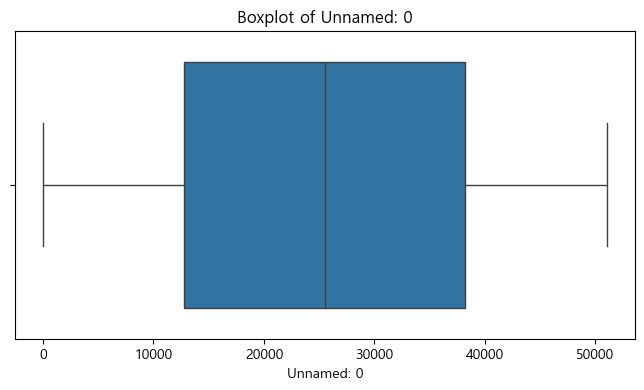

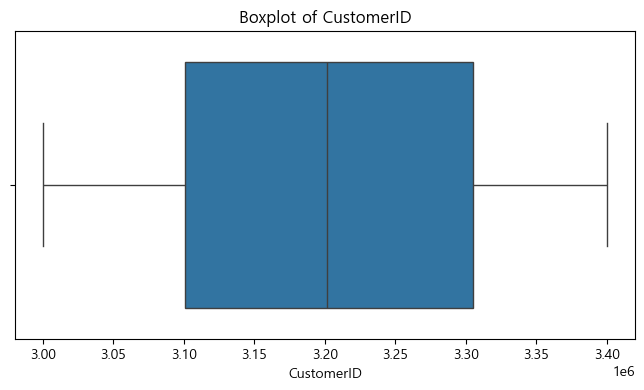

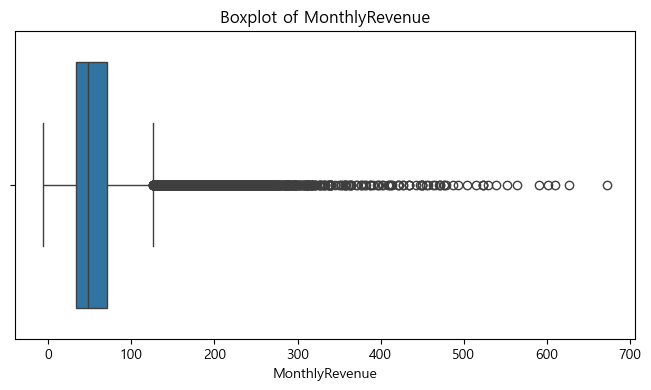

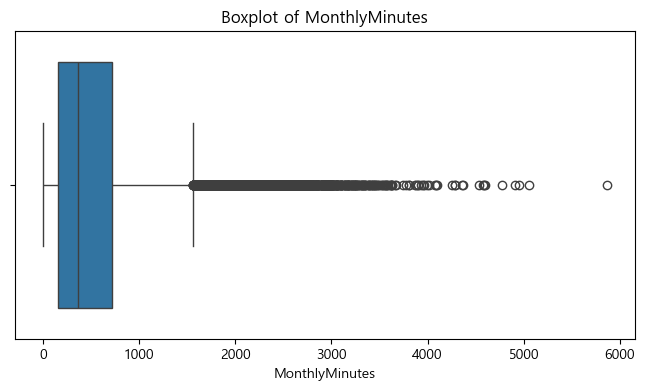

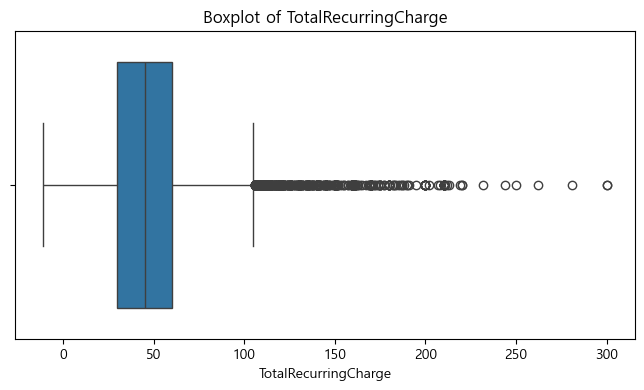

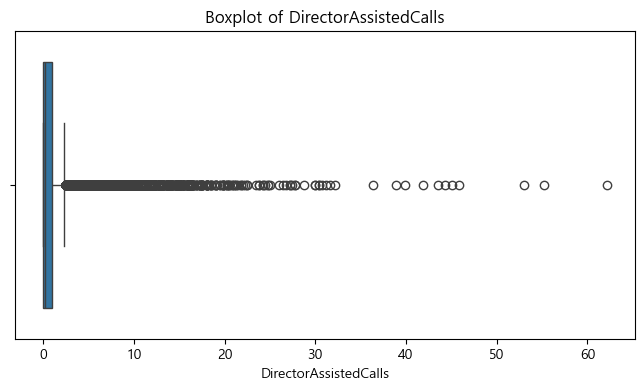

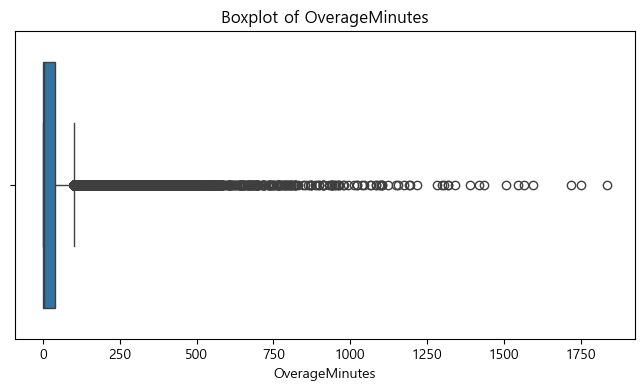

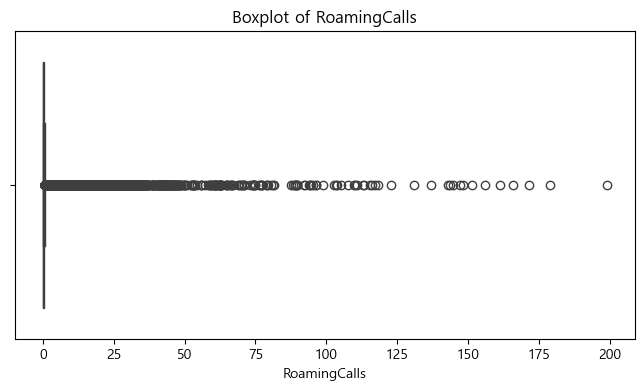

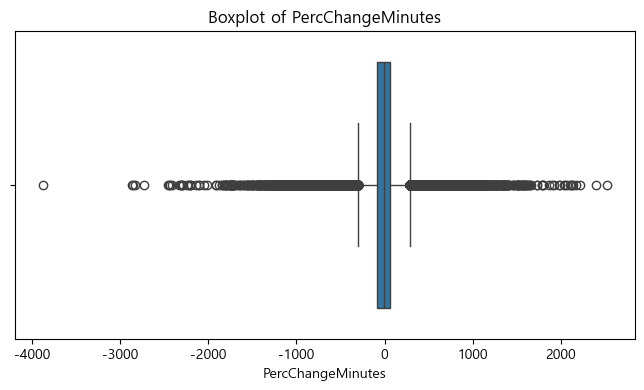

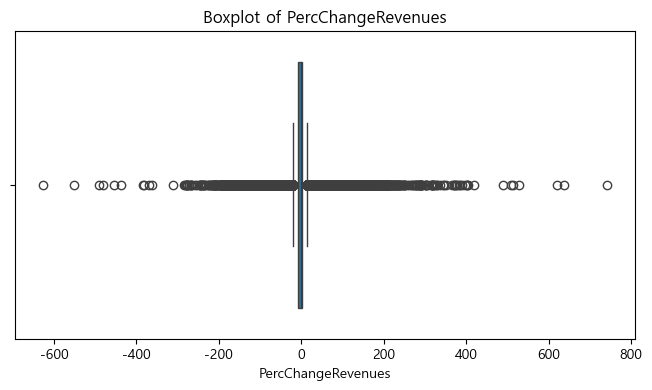

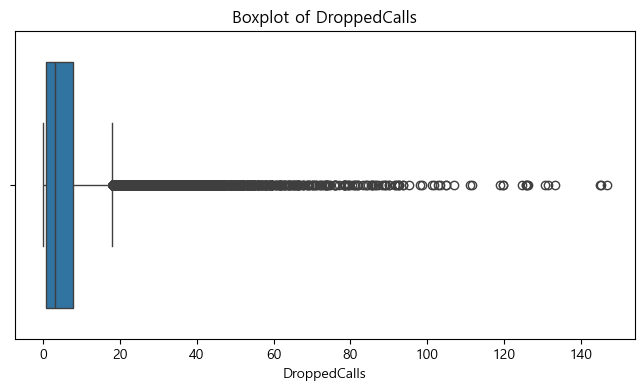

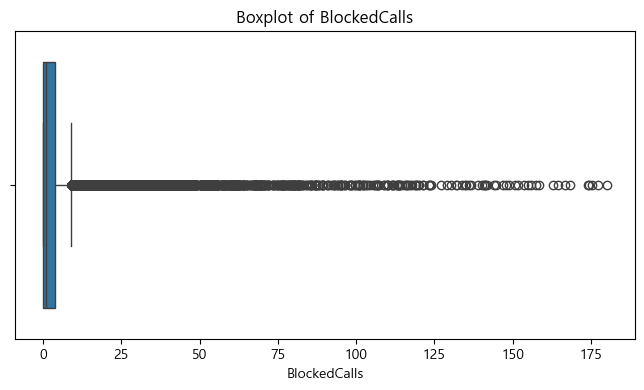

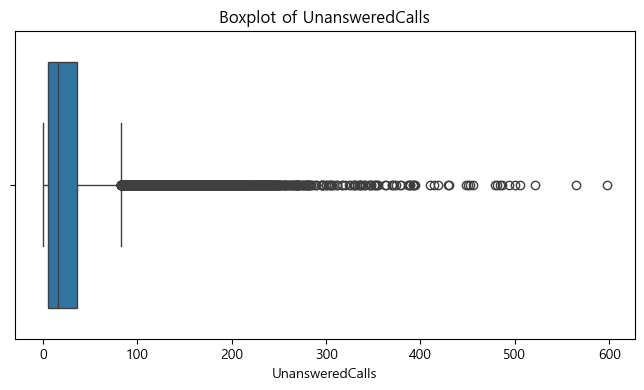

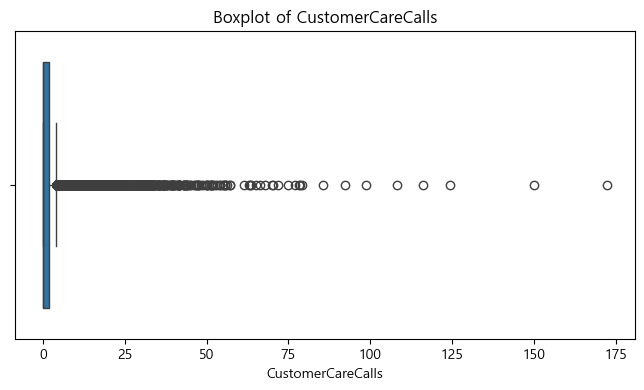

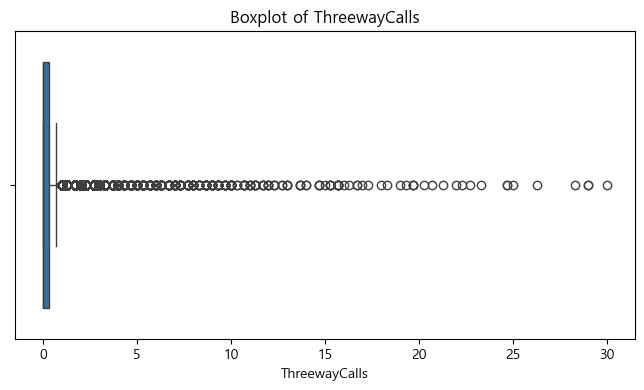

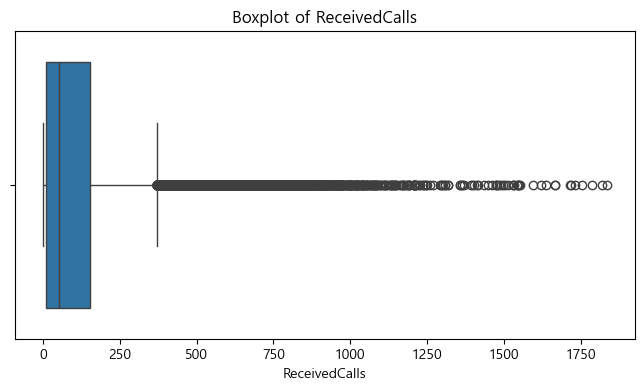

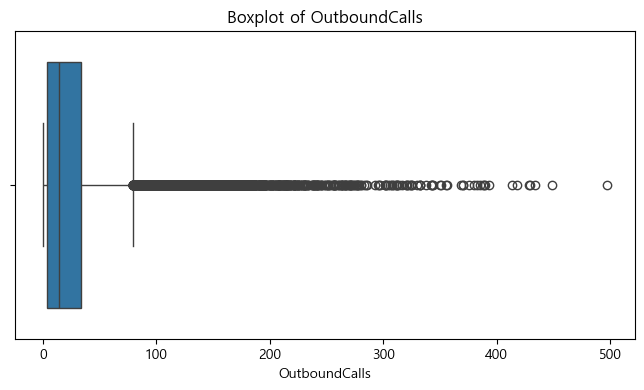

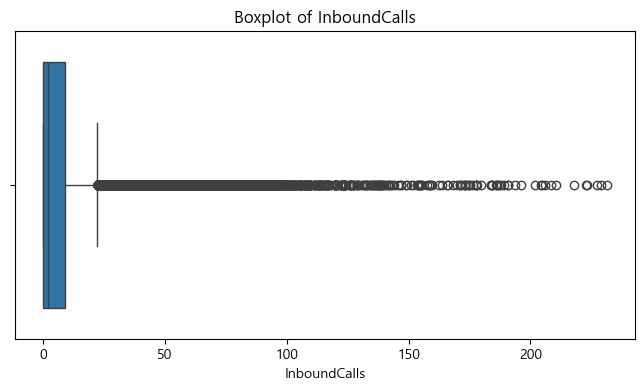

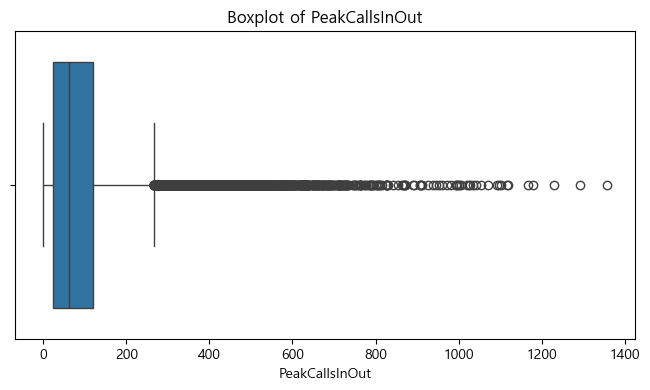

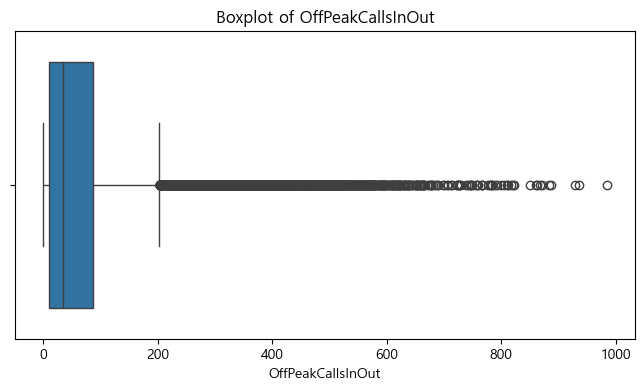

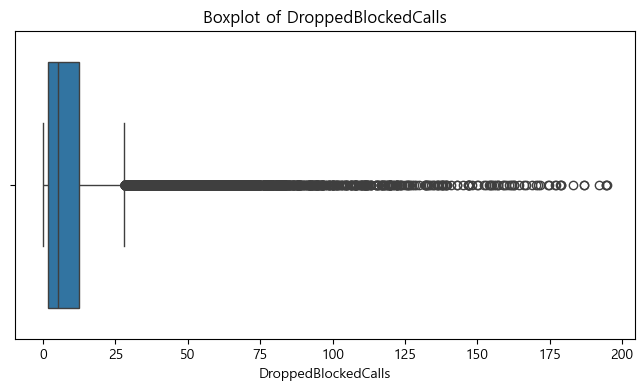

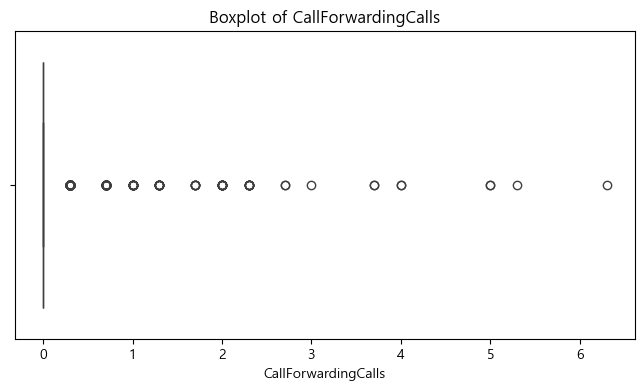

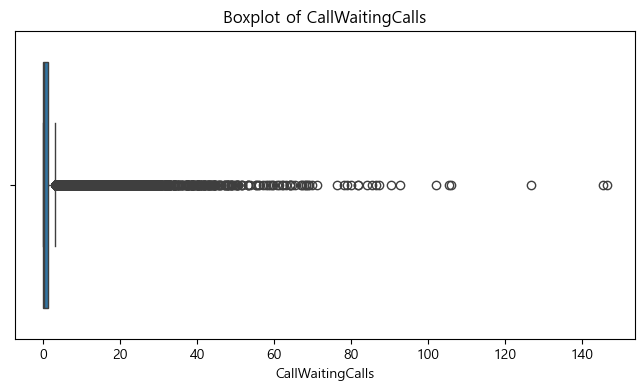

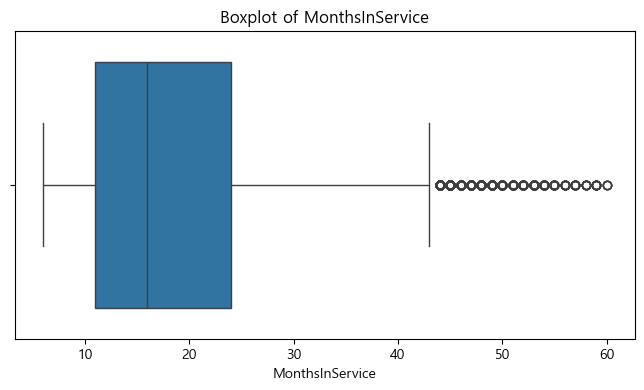

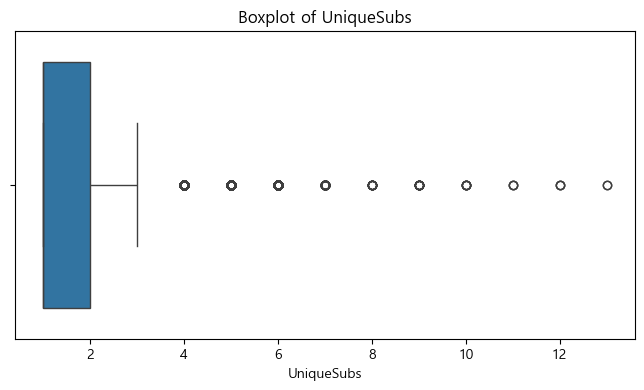

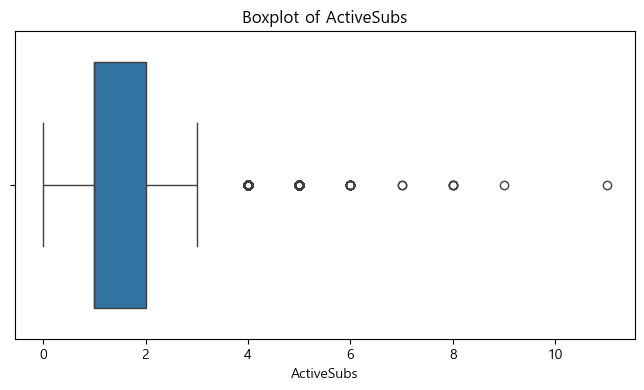

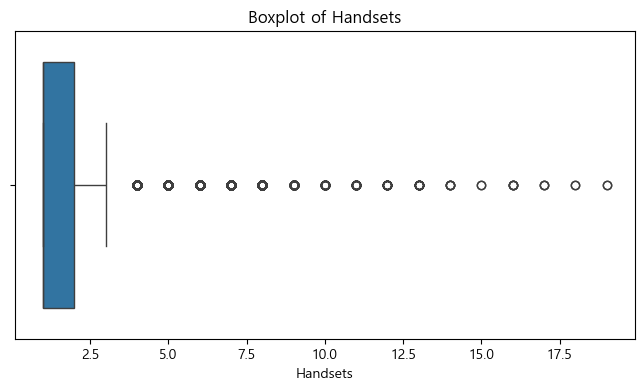

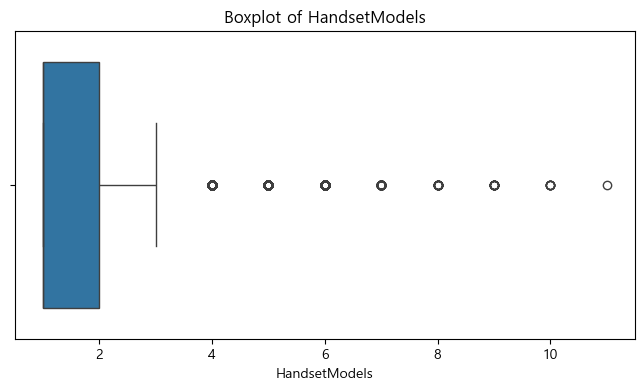

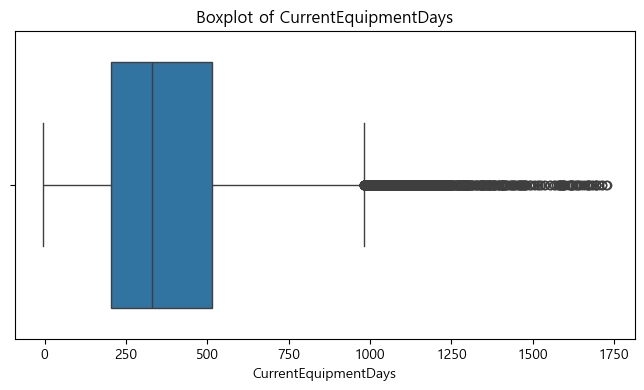

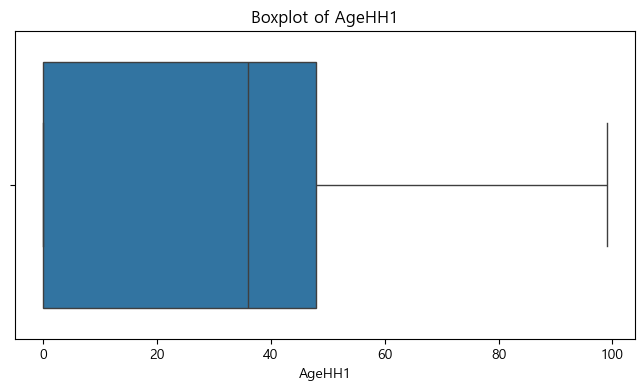

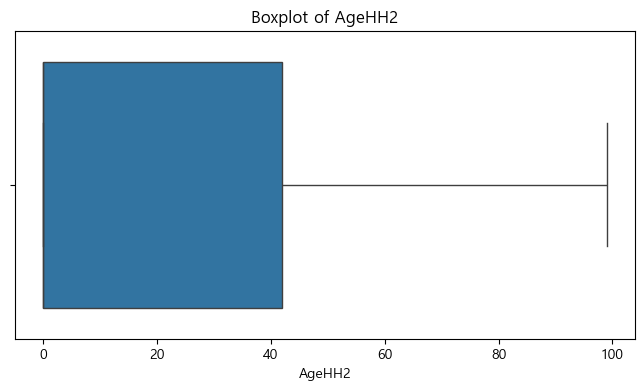

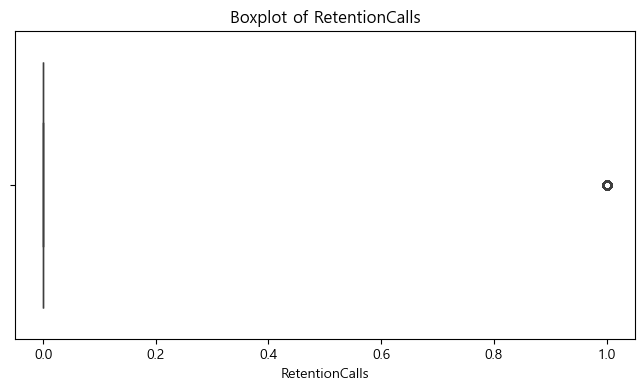

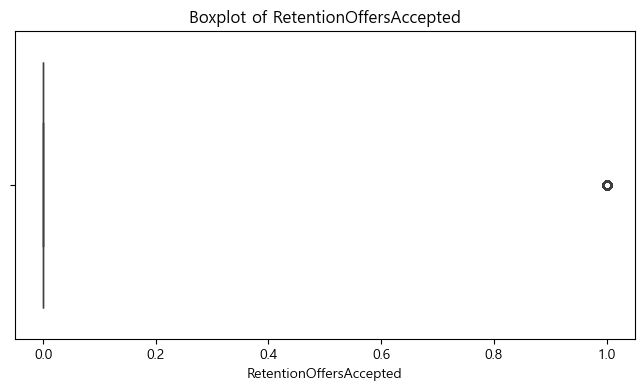

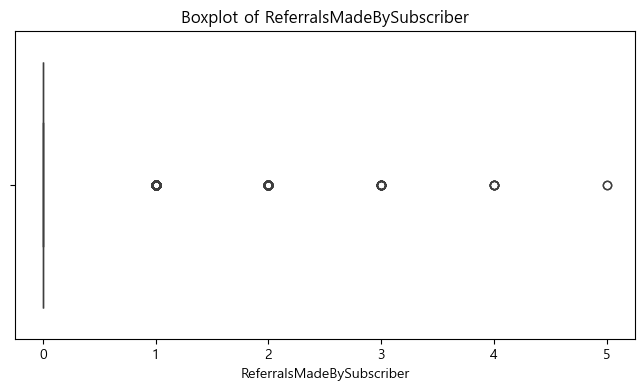

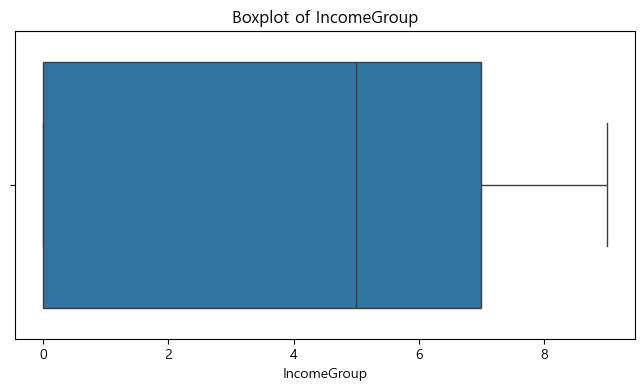

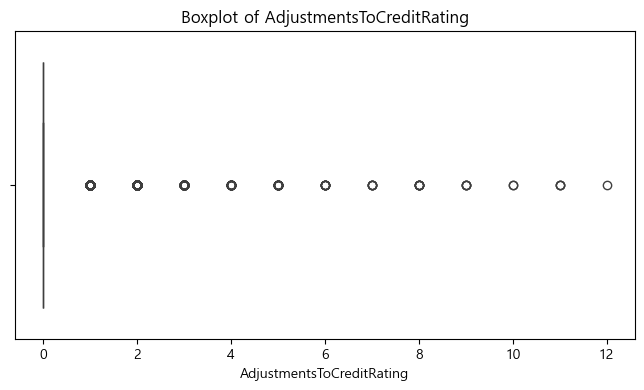

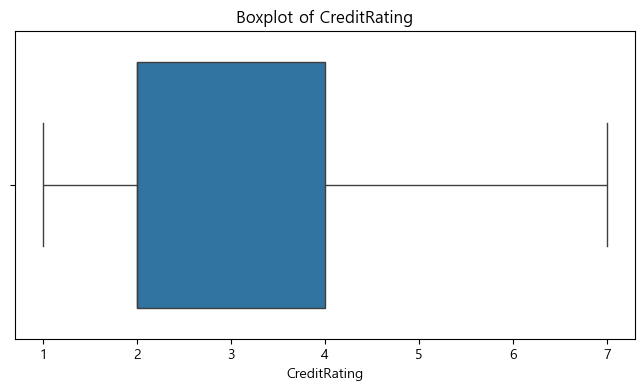

In [12]:
# 데이터 시각화 극단치 확인
def plot_boxplots(df):
    for i in df.columns:
        # 컬럼이 숫자형 데이터인지 확인 후 처리
        if df[i].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))  # 그래프 크기 설정
            sns.boxplot(x=df[i])  # 박스 플롯 그리기
            plt.title(f'Boxplot of {i}')  # 제목 설정
            plt.show()  # 그래프 출력

# 모든 컬럼에 대해 박스 플롯 그리기
plot_boxplots(train_cleaned)

In [ ]:
train_cleaned.to_csv('train_cleaned_outlier_outlier_del.csv', index=False)
print('데이터가 train_cleaned_outlier_outlier_del.csv로 저장되었습니다.')


In [12]:
# 이상치 다른 값으로 대체하기(극단치 > 하한선, 최소값, 상한선 > 최대값으로 대체)


def winsorize_data(df, column, lower_limit, upper_limit):
    df[column] = mstats.winsorize(df[column], limits=[lower_limit, upper_limit])
    

    return df

outlier_conditions = {
    'MonthlyRevenue': 1000,
    'MonthlyMinutes': 6000,
    'TotalRecurringCharge': 300,
    'DirectorAssistedCalls': 80,
    'OverageMinutes': 2000,
    'RoamingCalls': 200,
    'PercChangeMinutes': 3000,
    'PercChangeRevenues': 1000,
    'DroppedCalls': 150,
    'BlockedCalls': 300,
    'UnansweredCalls': 600,
    'CustomerCareCalls': 250,
    'ThreewayCalls': 30,
    'ReceivedCalls': 2000,
    'OutboundCalls': 500,
    'InboundCalls': 250,
    'PeakCallsInOut': 1500,
    'OffPeakCallsInOut': 1000,
    'DroppedBlockedCalls': 200,
    'CallForwardingCalls': 8,
    'CallWaitingCalls': 150,
    'MonthsInService': 60,
    'UniqueSubs': 15,
    'ActiveSubs': 20,
    'Handsets': 20,
    'HandsetModels': 12,
    'CurrentEquipmentDays': 1750,
    #'RetentionCalls': 1,
    #'RetentionOffersAccepted': 1,
    #'ReferralsMadeBySubscriber': 5,
    #'AdjustmentsToCreditRating': 15,
}


# 5% 수준 극단치 이용
for column in outlier_conditions.keys():
    train_winsorized = winsorize_data(train_cleaned, column, 0.05, 0.05)


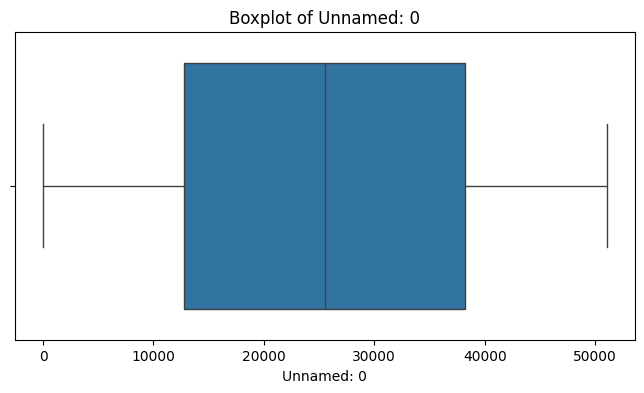

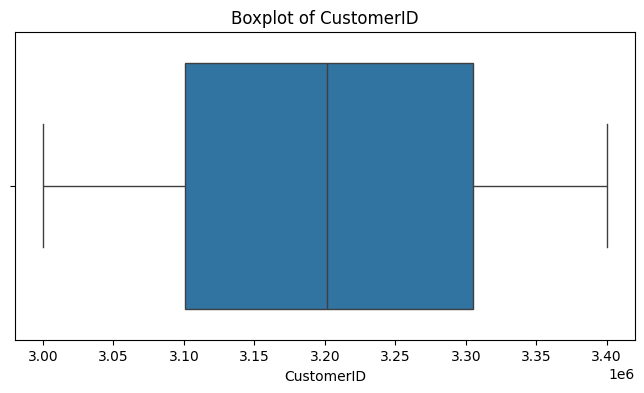

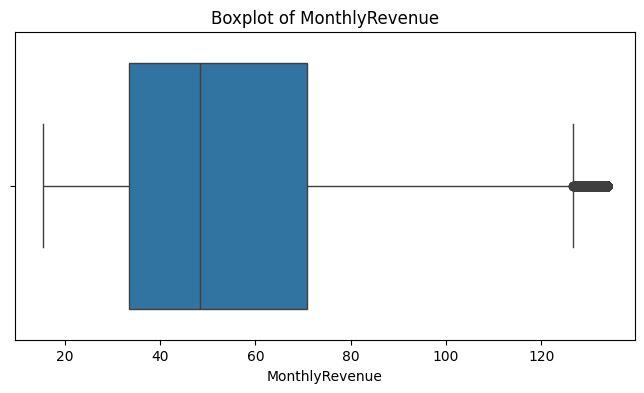

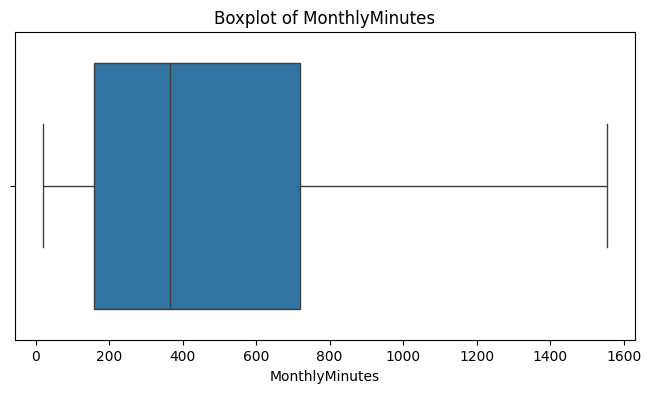

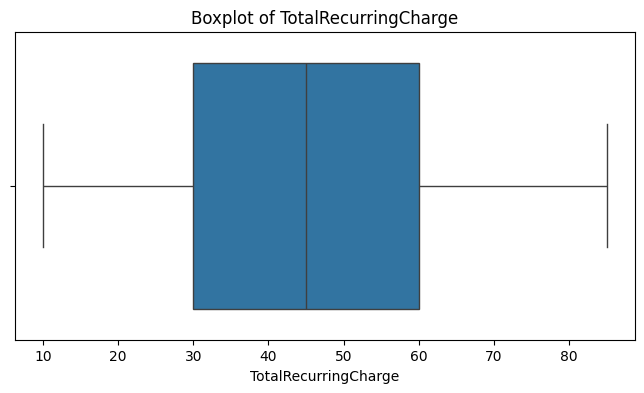

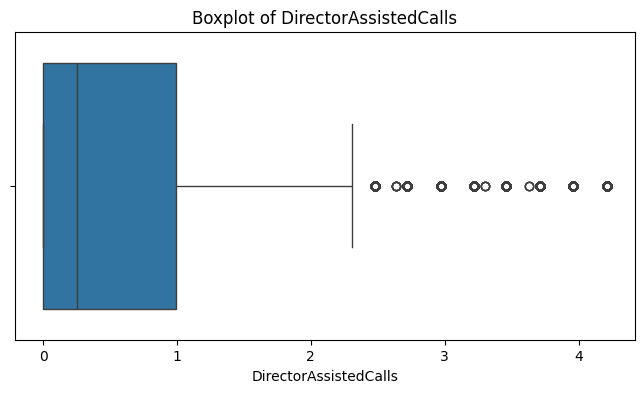

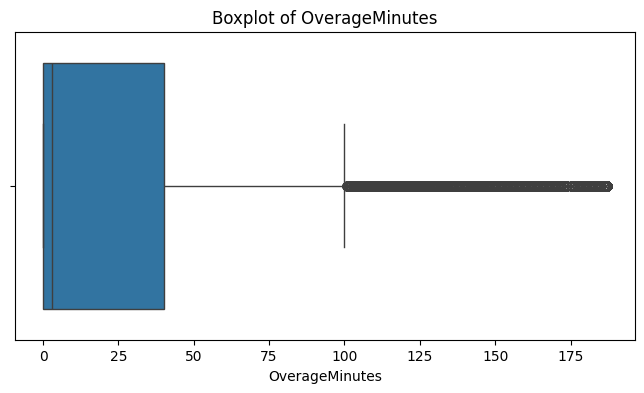

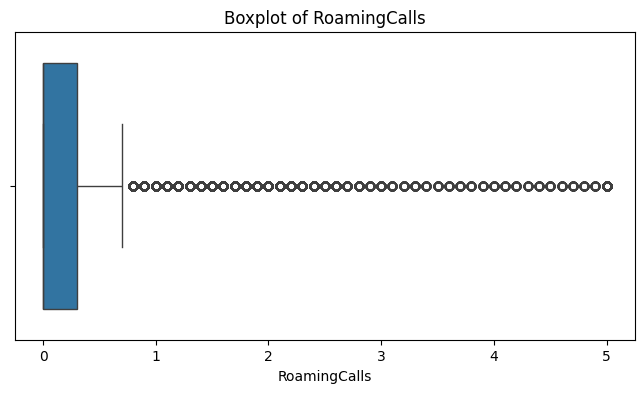

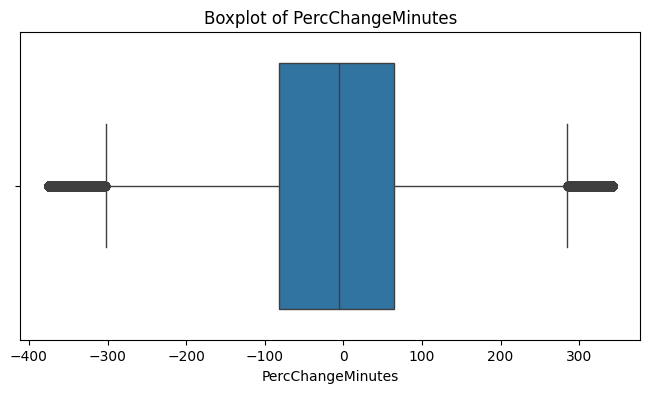

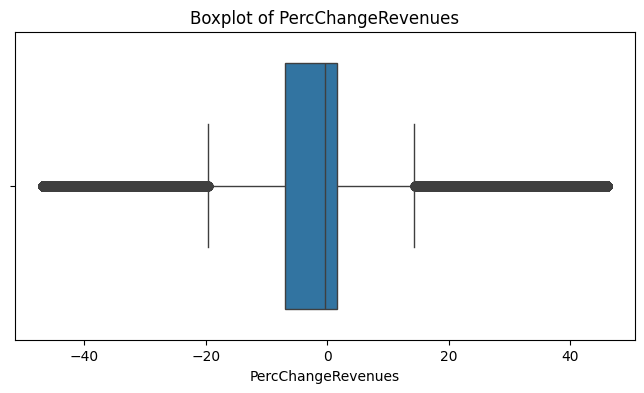

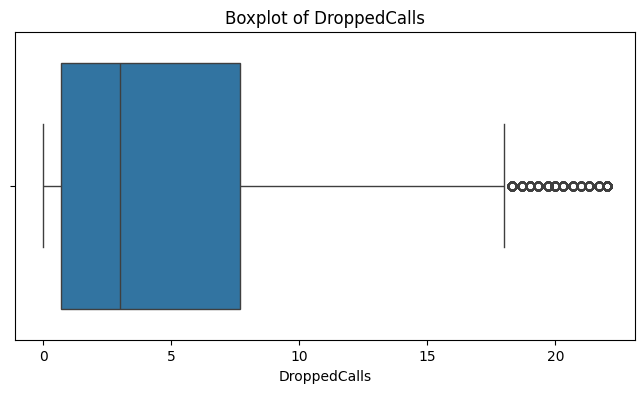

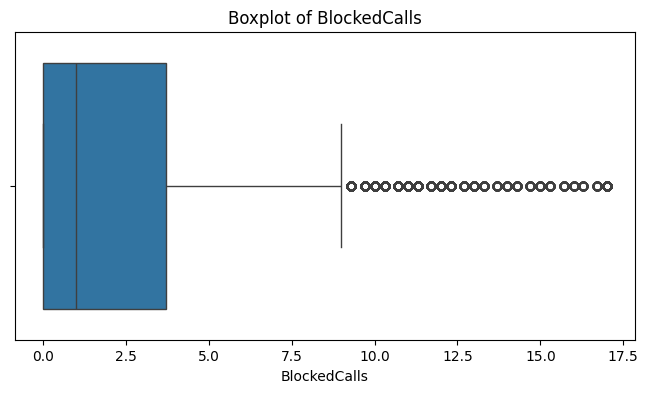

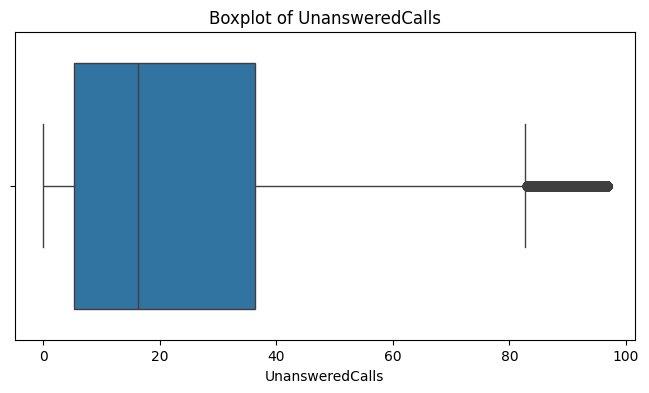

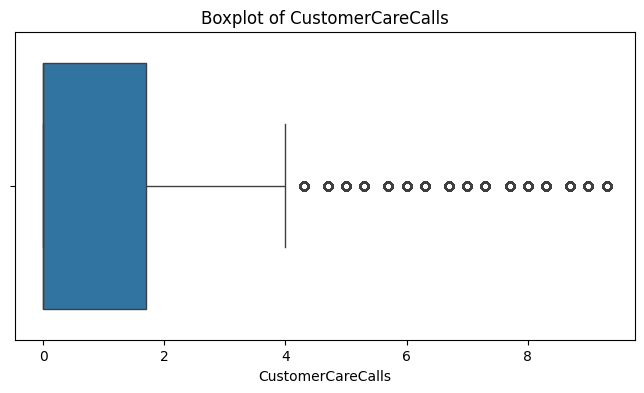

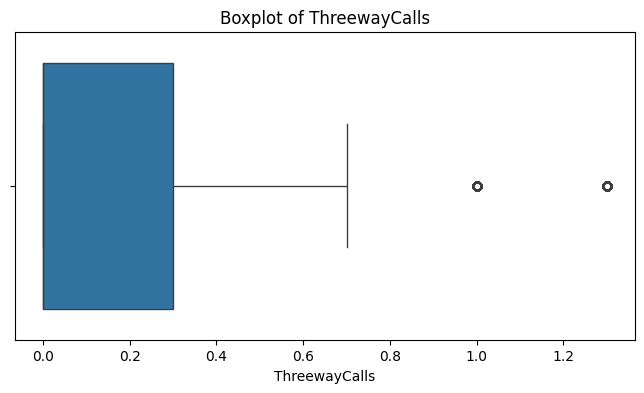

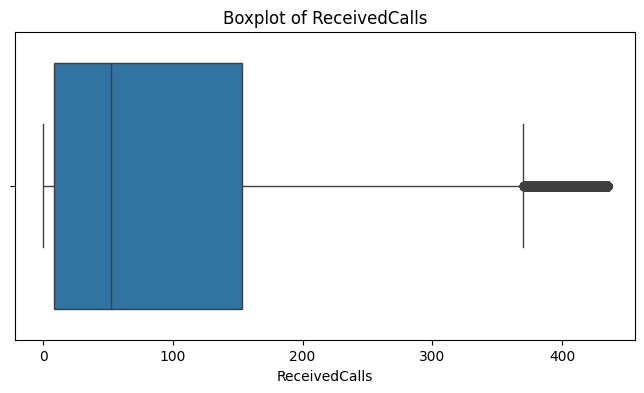

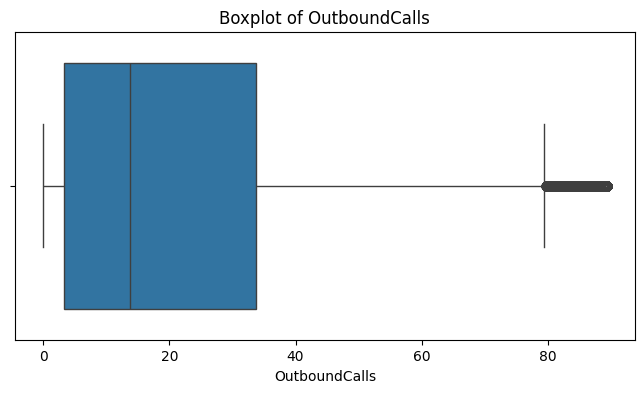

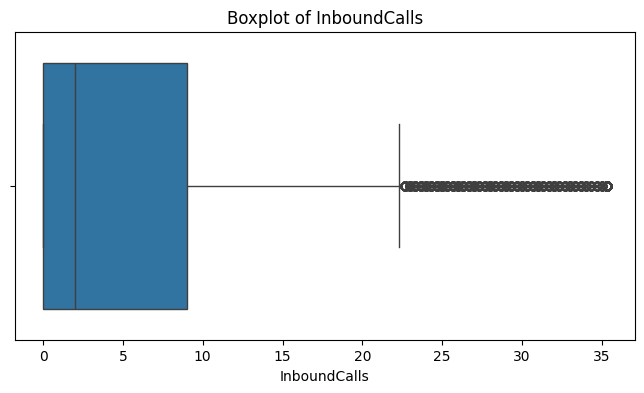

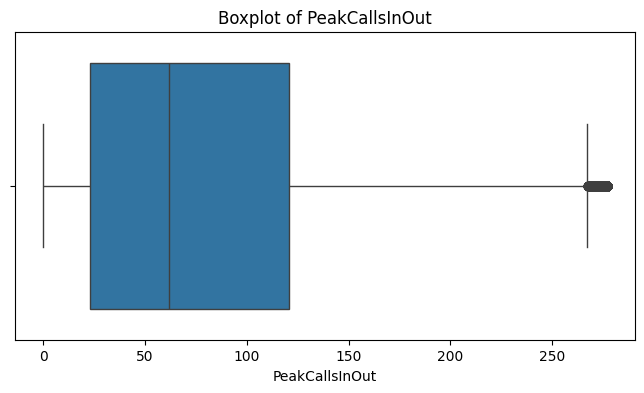

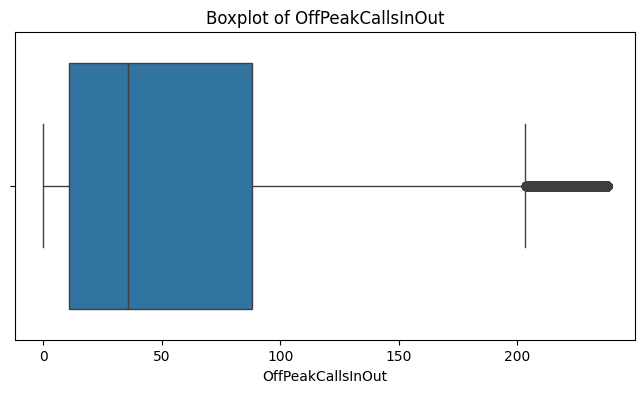

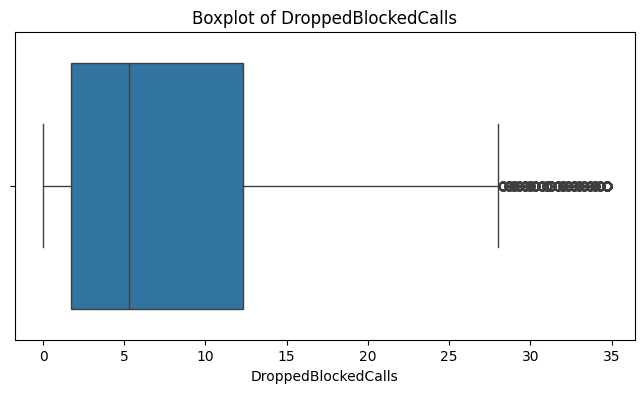

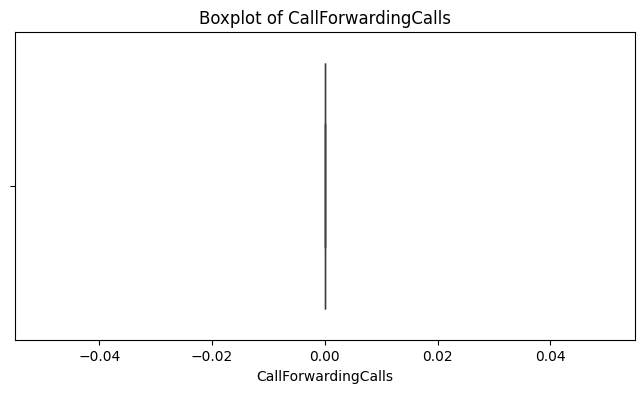

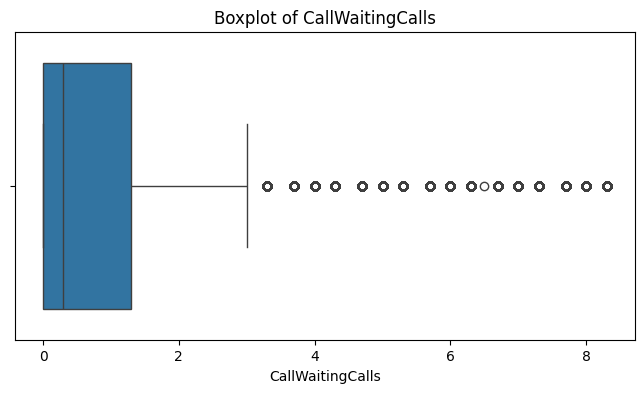

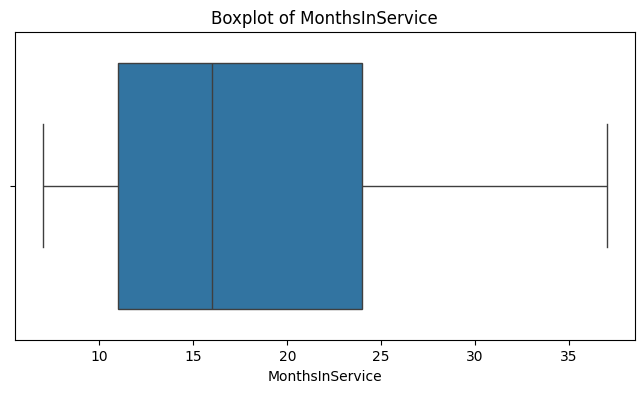

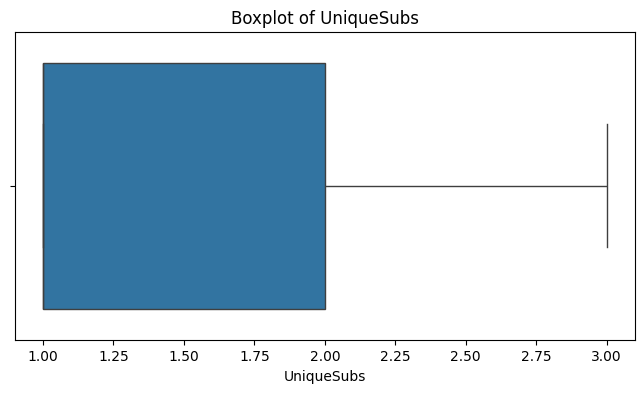

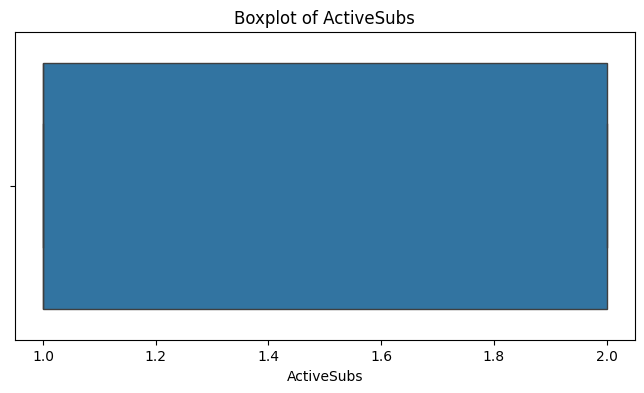

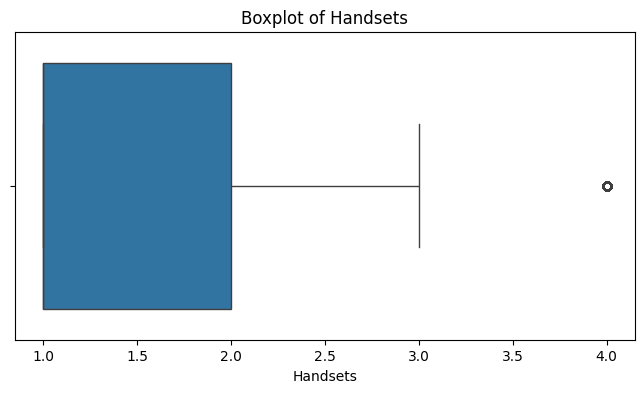

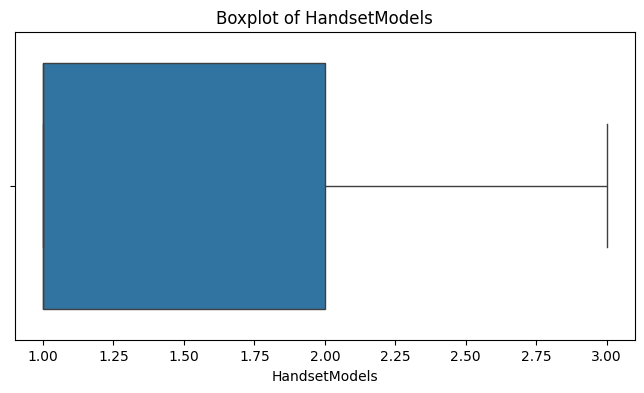

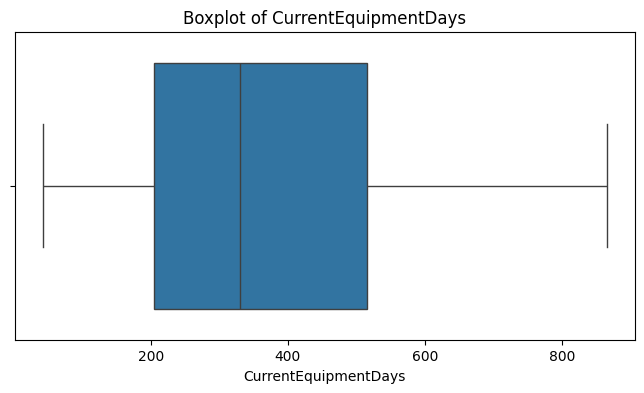

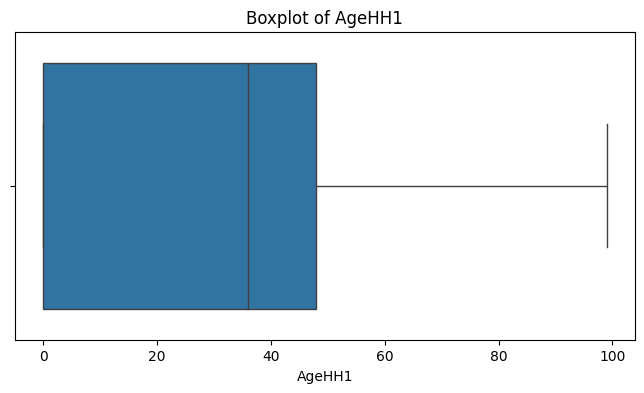

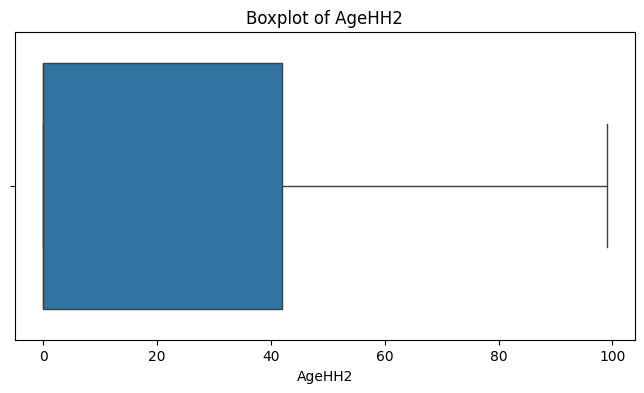

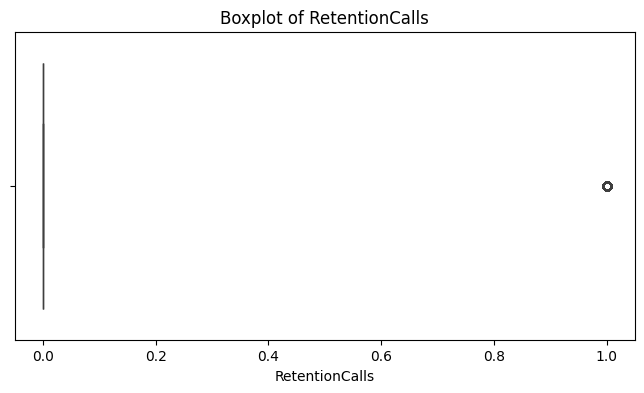

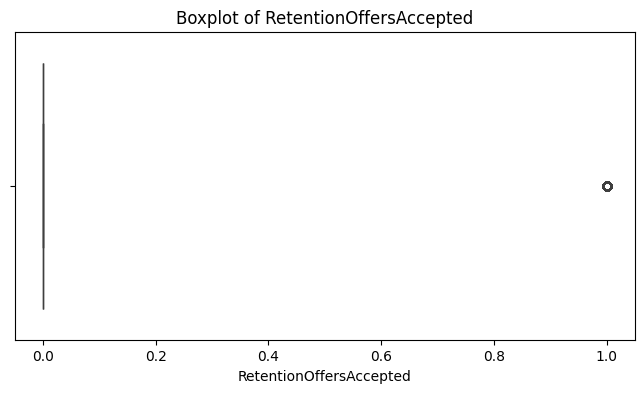

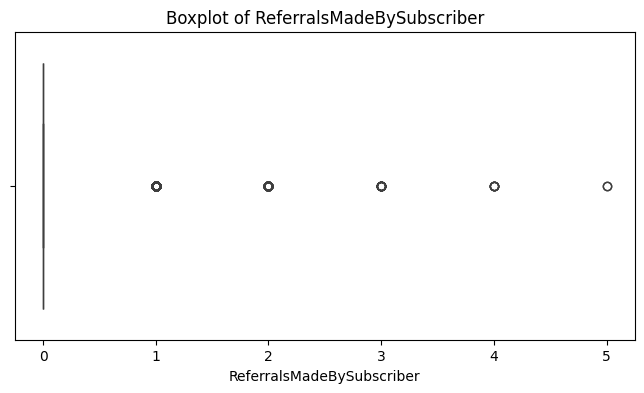

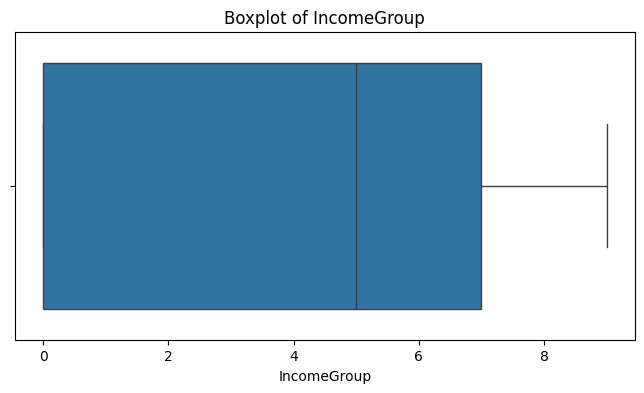

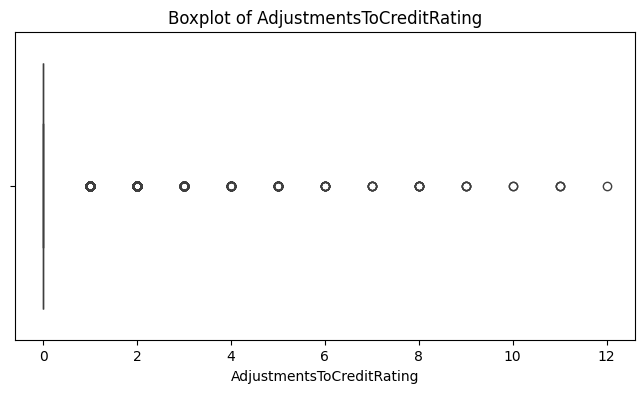

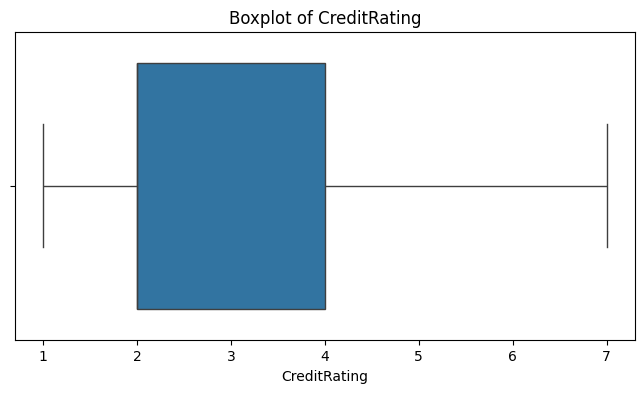

In [15]:
# 데이터 시각화 극단치 확인
def plot_boxplots(df):
    for i in df.columns:
        # 컬럼이 숫자형 데이터인지 확인 후 처리
        if df[i].dtype in ['int64', 'float64']:
            plt.figure(figsize=(8, 4))  # 그래프 크기 설정
            sns.boxplot(x=df[i])  # 박스 플롯 그리기
            plt.title(f'Boxplot of {i}')  # 제목 설정
            plt.show()  # 그래프 출력

# 모든 컬럼에 대해 박스 플롯 그리기
plot_boxplots(train_winsorized)

In [19]:
# Winsorization을 위한 함수 정의
def winsorize_data(df, column, lower_limit, upper_limit):
    original_values = df[column].copy()  # 원본 값 복사
    df[column] = mstats.winsorize(df[column], limits=[lower_limit, upper_limit])
    changed_values = df[column].copy()  # Winsorization 후 값 복사
    return df, original_values, changed_values

# 극단치 조건을 딕셔너리로 정의
outlier_conditions = {
    'MonthlyRevenue': 1000,
    'MonthlyMinutes': 6000,
    'TotalRecurringCharge': 300,
    'DirectorAssistedCalls': 80,
    'OverageMinutes': 2000,
    'RoamingCalls': 200,
    'PercChangeMinutes': 3000,
    'PercChangeRevenues': 1000,
    'DroppedCalls': 150,
    'BlockedCalls': 300,
    'UnansweredCalls': 600,
    'CustomerCareCalls': 250,
    'ThreewayCalls': 30,
    'ReceivedCalls': 2000,
    'OutboundCalls': 500,
    'InboundCalls': 250,
    'PeakCallsInOut': 1500,
    'OffPeakCallsInOut': 1000,
    'DroppedBlockedCalls': 200,
    'CallForwardingCalls': 8,
    'CallWaitingCalls': 150,
    'MonthsInService': 60,
    'UniqueSubs': 15,
    'ActiveSubs': 20,
    'Handsets': 20,
    'HandsetModels': 12,
    'CurrentEquipmentDays': 1750,
    #'RetentionCalls': 1,
    #'RetentionOffersAccepted': 1,
    #'ReferralsMadeBySubscriber': 5,
    #'AdjustmentsToCreditRating': 15,
}

# 각 컬럼에 대해 Winsorization 적용
for column in outlier_conditions.keys():
    train, original_values, changed_values = winsorize_data(train, column, 0.05, 0.05)
    print(f'--- {column} ---')
    print(f'Original values:\n{original_values.describe()}')
    print(f'Winsorized values:\n{changed_values.describe()}')

# Winsorized 데이터 출력
print(train.head())


--- MonthlyRevenue ---
Original values:
count    50888.000000
mean        58.834637
std         44.508307
min         -6.170000
25%         33.610000
50%         48.460000
75%         71.062500
max       1223.380000
Name: MonthlyRevenue, dtype: float64
Winsorized values:
count    50888.000000
mean        55.995994
std         31.082768
min         15.470000
25%         33.610000
50%         48.460000
75%         71.062500
max        135.190000
Name: MonthlyRevenue, dtype: float64
--- MonthlyMinutes ---
Original values:
count    50888.000000
mean       525.673676
std        529.876487
min          0.000000
25%        158.000000
50%        366.000000
75%        723.000000
max       7359.000000
Name: MonthlyMinutes, dtype: float64
Winsorized values:
count    50888.000000
mean       499.025586
std        435.559379
min         20.000000
25%        158.000000
50%        366.000000
75%        723.000000
max       1577.000000
Name: MonthlyMinutes, dtype: float64
--- TotalRecurringCharge ---
O

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages

--- UniqueSubs ---
Original values:
count    50888.000000
mean         1.531756
std          1.224457
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        196.000000
Name: UniqueSubs, dtype: float64
Winsorized values:
count    50888.000000
mean         1.470170
std          0.669583
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: UniqueSubs, dtype: float64
--- ActiveSubs ---
Original values:
count    50888.000000
mean         1.353856
std          0.675578
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         53.000000
Name: ActiveSubs, dtype: float64
Winsorized values:
count    50888.000000
mean         1.288241
std          0.452948
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: ActiveSubs, dtype: float64
--- Handsets ---
Original values:
count    50888.00000

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


In [ ]:
# train_winsorized.to_csv('train_cleaned_outlier_winsorized_del.csv', index=False)
# print('데이터가 train_cleaned_outlier_winsorized_del.csv로 저장되었습니다.')


In [26]:
# 상관관계가 0.5 이상인 컬럼 필터링 함수
def get_high_corr_columns(corr_matrix, threshold=0.5):
    high_corr = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]  # 절대값 0.5 이상인 상관관계
    high_corr = high_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')  # 상관관계 없는 컬럼 제거
    return high_corr

# 분석할 컬럼 목록 (outlier_conditions의 key 값)
outlier_columns = [
    'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 
    'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 
    'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 
    'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 
    'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 
    'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 
    'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 
    'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'AdjustmentsToCreditRating'
]

# Churn이 'Yes'인 데이터와 'No'인 데이터를 나누기
churn_yes = train[train['Churn'] == 'Yes'][outlier_columns]
churn_no = train[train['Churn'] == 'No'][outlier_columns]

# Churn이 'Yes'인 데이터와 'No'인 데이터의 상관관계 계산
corr_yes = churn_yes.corr()
corr_no = churn_no.corr()

# 상관관계가 0.5 이상인 컬럼 추출
high_corr_yes = get_high_corr_columns(corr_yes, 0.5)
high_corr_no = get_high_corr_columns(corr_no, 0.5)

# 결과 출력
print("Churn = Yes에서 상관관계 0.5 이상인 컬럼들:")
print(high_corr_yes)

print("\nChurn = No에서 상관관계 0.5 이상인 컬럼들:")
print(high_corr_no)


Churn = Yes에서 상관관계 0.5 이상인 컬럼들:
                           MonthlyRevenue  MonthlyMinutes  \
MonthlyRevenue                   1.000000        0.710808   
MonthlyMinutes                   0.710808        1.000000   
TotalRecurringCharge             0.671231        0.545810   
DirectorAssistedCalls                 NaN             NaN   
OverageMinutes                   0.756018        0.589859   
RoamingCalls                          NaN             NaN   
PercChangeMinutes                     NaN             NaN   
PercChangeRevenues                    NaN             NaN   
DroppedCalls                          NaN        0.633258   
BlockedCalls                          NaN             NaN   
UnansweredCalls                       NaN        0.691147   
CustomerCareCalls                     NaN             NaN   
ThreewayCalls                         NaN             NaN   
ReceivedCalls                    0.614417        0.826531   
OutboundCalls                    0.516488        0.70

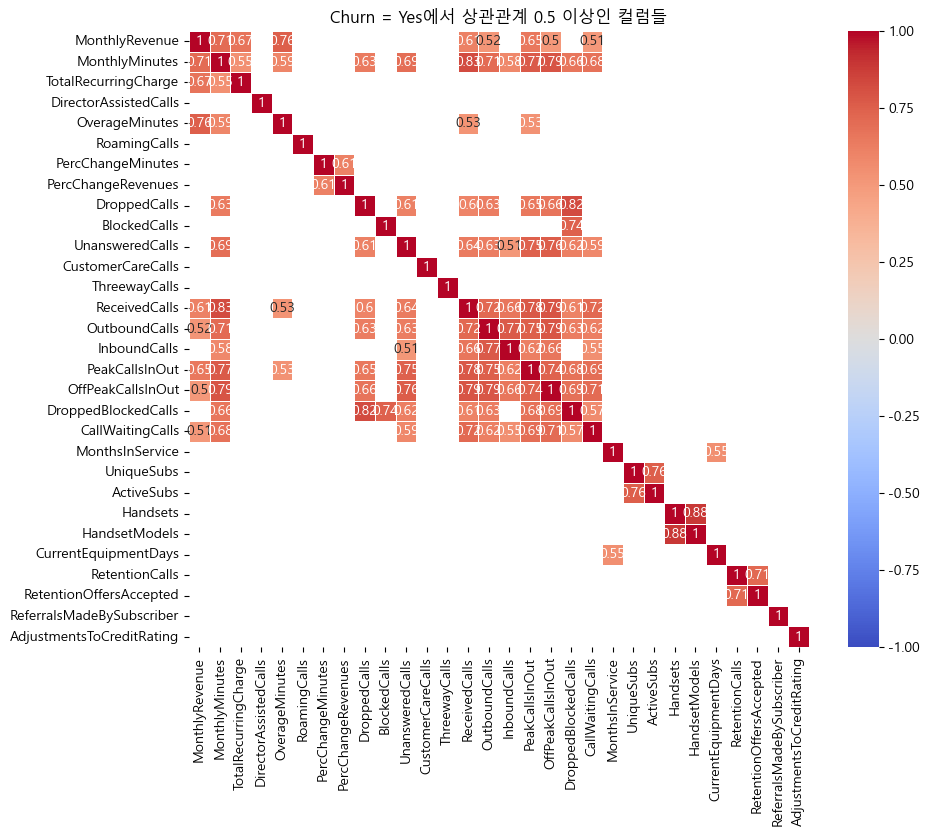

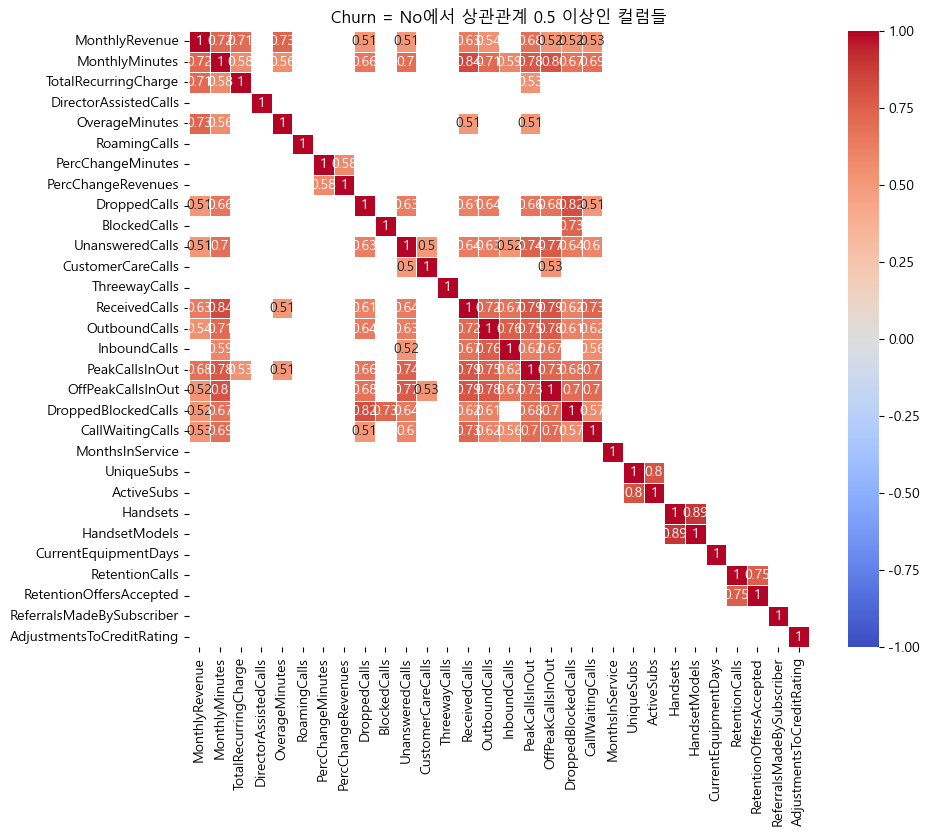

In [29]:
# 상관관계 시각화를 위한 함수 정의
def plot_high_corr_heatmap(corr_matrix, title):
    plt.figure(figsize=(10, 8))  # 그래프 크기 설정
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
    plt.title(title)
    plt.show()

# Churn = Yes 데이터 상관관계 히트맵 시각화
plot_high_corr_heatmap(high_corr_yes, 'Churn = Yes에서 상관관계 0.5 이상인 컬럼들')

# Churn = No 데이터 상관관계 히트맵 시각화
plot_high_corr_heatmap(high_corr_no, 'Churn = No에서 상관관계 0.5 이상인 컬럼들')


In [32]:
# 데이터프레임의 숫자형 데이터만 선택하는 함수
def select_numeric_columns(df):
    return df.select_dtypes(include=['number'])

# 특정 컬럼 제외 후 상관관계 계산
def calculate_corr_excluding_column(df, target_column, exclude_columns):
    # 숫자형 데이터만 선택
    filtered_df = df.drop(columns=exclude_columns)
    numeric_df = select_numeric_columns(filtered_df)
    corr_matrix = numeric_df.corr()
    return corr_matrix

# 대표 컬럼 추출 함수
def get_representative_columns(corr_matrix, threshold=0.5):
    high_corr_columns = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]
    high_corr_columns = high_corr_columns.dropna(axis=0, how='all').dropna(axis=1, how='all')
    
    # 대표 컬럼 선정 (상관관계가 높은 컬럼 중 임의로 선택)
    representative_columns = high_corr_columns.columns.tolist()
    return representative_columns

# Churn 데이터와 특정 제외 컬럼
exclude_columns = ['Churn']  # 제외할 특정 컬럼 리스트
target_column = 'Churn'  # 타겟 컬럼

# 상관관계 계산
corr_matrix = calculate_corr_excluding_column(train, target_column, exclude_columns)

# 전체 컬럼에 대해 대표 컬럼 추출
representative_columns = get_representative_columns(corr_matrix, 0.5)

# 결과 출력
print("전체 컬럼에 대한 상관관계가 0.5 이상인 대표 컬럼들:")
print(representative_columns)


전체 컬럼에 대한 상관관계가 0.5 이상인 대표 컬럼들:
['Unnamed: 0', 'CustomerID', 'MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating', 'CreditRating']
